In [4]:
from konfuzio_sdk.data import Project
from konfuzio_sdk.tokenizer.regex import WhitespaceTokenizer as KWT
from nltk.tokenize import word_tokenize, NLTKWordTokenizer
from nltk.tokenize import WhitespaceTokenizer as WT
import os
import random
from copy import deepcopy
from PIL import Image 
import PIL 

ERROR:root:A library tensorflow-cpu has not been found, so Konfuzio SDK is initialized without the AI components. To install Konfuzio SDK with all the AI-related libraries, see https://dev.konfuzio.com/sdk/get_started/index.html#install-konfuzio-sdk-package.


# Versicherungsdokumente

In [198]:
project_id = 16
project = Project(id_=project_id, update=True, strict_data_validation=False)
project

Project 16

In [100]:
project.categories

[Category: SV Risk Report 2 (92)]

In [102]:
document = project.get_document_by_id(1132)

In [165]:
def get_word_bboxes(document):

    raw_document = deepcopy(document)  # get Document with no Annotations
    tokenizer = KWT()
    tk_document = tokenizer(raw_document)
    tk_document.get_images(update=True)

    return tk_document

In [193]:
tk_doc = get_word_bboxes(document)

In [195]:
tk_doc.copy_of_id

1132

In [201]:
def process_document(document):
    dataset_column_dictionary = {
        'page_index': [],
        'top': [],
        'bottom': [],
        'x0': [],
        'y0': [],
        'x1': [],
        'y1': [],
        'label': [],
        'label_set': [],
        'start_offset': [],
        'end_offset': [],
        'offset_string': [],
        'file_name': [],
        'file_path': []
    }

    annotations = document.get_annotations()

    for idx, _ in enumerate(annotations):
        nr_bboxes_in_annotations = len(annotations[idx].bboxes)

        for bnr in range(nr_bboxes_in_annotations):
            
            bbox = annotations[idx].bboxes[bnr]

            page_index = bbox['page_index']
            top = bbox['top']
            bottom = bbox['bottom']
            x0 = bbox['x0']
            y0 = bbox['y0']
            x1 = bbox['x1']
            y1 = bbox['y1']
            label = annotations[idx].label.name_clean
            label_set = annotations[idx].label_set.name_clean
            bbox = annotations[idx].bboxes[bnr]
            start_offset = bbox['start_offset']
            end_offset = bbox['end_offset']
            offset_string = bbox['offset_string']
            file_name = "page_" + str(page_index) + ".png"
            file_path = os.getcwd()  + '/' + 'data_' + str(project_id) + '/documents/' + str(annotations[idx].document.copy_of_id) + "/" + file_name

            dataset_column_dictionary['page_index'].append(page_index)
            dataset_column_dictionary['top'].append(top)
            dataset_column_dictionary['bottom'].append(bottom)
            dataset_column_dictionary['x0'].append(x0)
            dataset_column_dictionary['y0'].append(y0)
            dataset_column_dictionary['x1'].append(x1)
            dataset_column_dictionary['y1'].append(y1)
            dataset_column_dictionary['label'].append(label)
            dataset_column_dictionary['label_set'].append(label_set)
            dataset_column_dictionary['start_offset'].append(start_offset)
            dataset_column_dictionary['end_offset'].append(end_offset)
            dataset_column_dictionary['offset_string'].append(offset_string)
            dataset_column_dictionary['file_name'].append(file_name)
            if os.path.exists(file_path):
                dataset_column_dictionary['file_path'] = file_path
            else:
                dataset_column_dictionary['file_path'] = "NA"

    return dataset_column_dictionary

def process_word_bboxes_document(document):
    
    dataset_column_dictionary = {
        'start_offset': [],
        'end_offset': [],
        'line_number': [],
        'offset_string': [],
        'offset_string_original': [],
        'page_index': [],
        'top': [],
        'bottom': [],
        'x0': [],
        'y0': [],
        'x1': [],
        'y1': [],
        'file_name': [],
        'file_path': []
    }

    annotations = document.get_annotations()

    for idx, _ in enumerate(annotations):
        nr_bboxes_in_annotations = len(annotations[idx].bboxes)

        for bnr in range(nr_bboxes_in_annotations):
            bbox = annotations[idx].bboxes[bnr]
            
            page_index = bbox['page_index']
            top = bbox['top']
            bottom = bbox['bottom']
            x0 = bbox['x0']
            y0 = bbox['y0']
            x1 = bbox['x1']
            y1 = bbox['y1']
            start_offset = bbox['start_offset']
            end_offset = bbox['end_offset']
            offset_string = bbox['offset_string']
            file_name = "page_" + str(page_index) + ".png"
            file_path =  os.getcwd() + '/' + 'data_' + str(project_id) + '/documents/' + str(annotations[idx].document.copy_of_id) + "/" + file_name

            dataset_column_dictionary['start_offset'].append(start_offset)
            dataset_column_dictionary['end_offset'].append(end_offset)
            dataset_column_dictionary['offset_string'].append(offset_string)
            dataset_column_dictionary['offset_string_original'].append(offset_string)
            dataset_column_dictionary['page_index'].append(page_index)
            dataset_column_dictionary['top'].append(top)
            dataset_column_dictionary['bottom'].append(bottom)
            dataset_column_dictionary['x0'].append(x0)
            dataset_column_dictionary['y0'].append(y0)
            dataset_column_dictionary['x1'].append(x1)
            dataset_column_dictionary['y1'].append(y1)
            dataset_column_dictionary['line_number'].append(idx + 1)
            dataset_column_dictionary['file_name'].append(file_name)
            if os.path.exists(file_path):
                dataset_column_dictionary['file_path'] = file_path
            else:
                dataset_column_dictionary['file_path'] = "NA"

    return dataset_column_dictionary


In [189]:
 file_path =  os.getcwd() + '/' + 'data_2/documents/' + str(annotations[idx].document.copy_of_id) + "/" + file_name

In [192]:
file_path

'/Users/christopherczaban/Local_Project_Files/konfuzio_sdk_DS_KonfuzioVM_Sematic-Segmentation-Tests/data_2/documents/None/page_3.png'

In [191]:
os.path.exists(file_path)

False

In [202]:
def get_dataframes_from_doc(document):
    import pandas as pd
    
    doc_with_word_level_bboxes = get_word_bboxes(document)
    word_boxes_dataset_column_dictionary = process_word_bboxes_document(doc_with_word_level_bboxes)
    no_label_annotations_df = pd.DataFrame(word_boxes_dataset_column_dictionary)

    dataset_column_dictionary = process_document(document)
    label_annotations_df = pd.DataFrame(dataset_column_dictionary)

    return no_label_annotations_df, label_annotations_df

def transfer_annotations(df1, df2):

    no_label_annotations_df = df1.copy()
    label_annotations_df = df2.copy()

    # Initialize the new columns 'label' and 'label_set' in df1 with default values
    no_label_annotations_df['label'] = 'NO_LABEL'
    no_label_annotations_df['label_set'] = 'NO_LABEL_SET'

    # Iterate through the rows of df1 and df2 and check for matching spans
    for index1, row1 in no_label_annotations_df.iterrows():
        for index2, row2 in label_annotations_df.iterrows():
            if row1['start_offset'] >= row2['start_offset'] and row1['end_offset'] <= row2['end_offset']:
                no_label_annotations_df.at[index1, 'label'] = row2['label']
                no_label_annotations_df.at[index1, 'label_set'] = row2['label_set']
                break  # break the inner loop once a match is found
    
    full_df = no_label_annotations_df

    full_df['bbox'] = list(map(list, zip(full_df['x0'].astype(int), full_df['y0'].astype(int), full_df['x1'].astype(int), full_df['y1'].astype(int))))

    return no_label_annotations_df

no_label_annotations_df, label_annotations_df = get_dataframes_from_doc(document)
full_df = transfer_annotations(no_label_annotations_df, label_annotations_df)


In [203]:
full_df

,start_offset,end_offset,line_number,offset_string,offset_string_original,page_index,top,bottom,x0,y0,x1,y1,file_name,file_path,label,label_set,bbox
0,71,79,1,Internal,Internal,0,17.7120,24.5664,282.5280,817.4736,312.8256,824.3280,page_0.png,/Users/christopherczaban/Local_Project_Files/k...,NO_LABEL,NO_LABEL_SET,"[282, 817, 312, 824]"
1,97,104,2,Allianz,Allianz,0,28.3464,38.7072,68.3424,803.3328,112.7952,813.6936,page_0.png,/Users/christopherczaban/Local_Project_Files/k...,NO_LABEL,NO_LABEL_SET,"[68, 803, 112, 813]"
2,105,137,3,Versicherungs-Aktiengesellschaft,Versicherungs-Aktiengesellschaft,0,28.3176,41.5584,117.3312,800.4816,342.4320,813.7224,page_0.png,/Users/christopherczaban/Local_Project_Files/k...,NO_LABEL,NO_LABEL_SET,"[117, 800, 342, 813]"
3,166,173,4,Allianz,Allianz,0,27.9576,47.3400,461.7432,794.7000,528.3720,814.0824,page_0.png,/Users/christopherczaban/Local_Project_Files/k...,NO_LABEL,NO_LABEL_SET,"[461, 794, 528, 814]"
4,174,176,5,1),1),0,27.9576,47.3400,532.2456,794.7000,557.0424,814.0824,page_0.png,/Users/christopherczaban/Local_Project_Files/k...,NO_LABEL,NO_LABEL_SET,"[532, 794, 557, 814]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5657,99290,99293,5658,HRB,HRB,30,784.0728,788.3784,171.9576,53.6616,183.9240,57.9672,page_30.png,/Users/christopherczaban/Local_Project_Files/k...,NO_LABEL,NO_LABEL_SET,"[171, 53, 183, 57]"
5658,99294,99299,5659,75727,75727,30,784.1592,788.4864,185.9976,53.5536,202.2336,57.8808,page_30.png,/Users/christopherczaban/Local_Project_Files/k...,NO_LABEL,NO_LABEL_SET,"[185, 53, 202, 57]"
5659,99322,99329,5660,Bericht,Bericht,30,803.3832,807.0768,68.4360,34.9632,83.6568,38.6568,page_30.png,/Users/christopherczaban/Local_Project_Files/k...,NO_LABEL,NO_LABEL_SET,"[68, 34, 83, 38]"
5660,99330,99337,5661,Extern1,Extern1,30,803.3832,807.0768,85.5288,34.9632,101.3040,38.6568,page_30.png,/Users/christopherczaban/Local_Project_Files/k...,NO_LABEL,NO_LABEL_SET,"[85, 34, 101, 38]"


In [204]:
full_df['bbox']

0       [282, 817, 312, 824]
1        [68, 803, 112, 813]
2       [117, 800, 342, 813]
3       [461, 794, 528, 814]
4       [532, 794, 557, 814]
                ...         
5657      [171, 53, 183, 57]
5658      [185, 53, 202, 57]
5659        [68, 34, 83, 38]
5660       [85, 34, 101, 38]
5661      [103, 34, 113, 38]
Name: bbox, Length: 5662, dtype: object

1029 1456


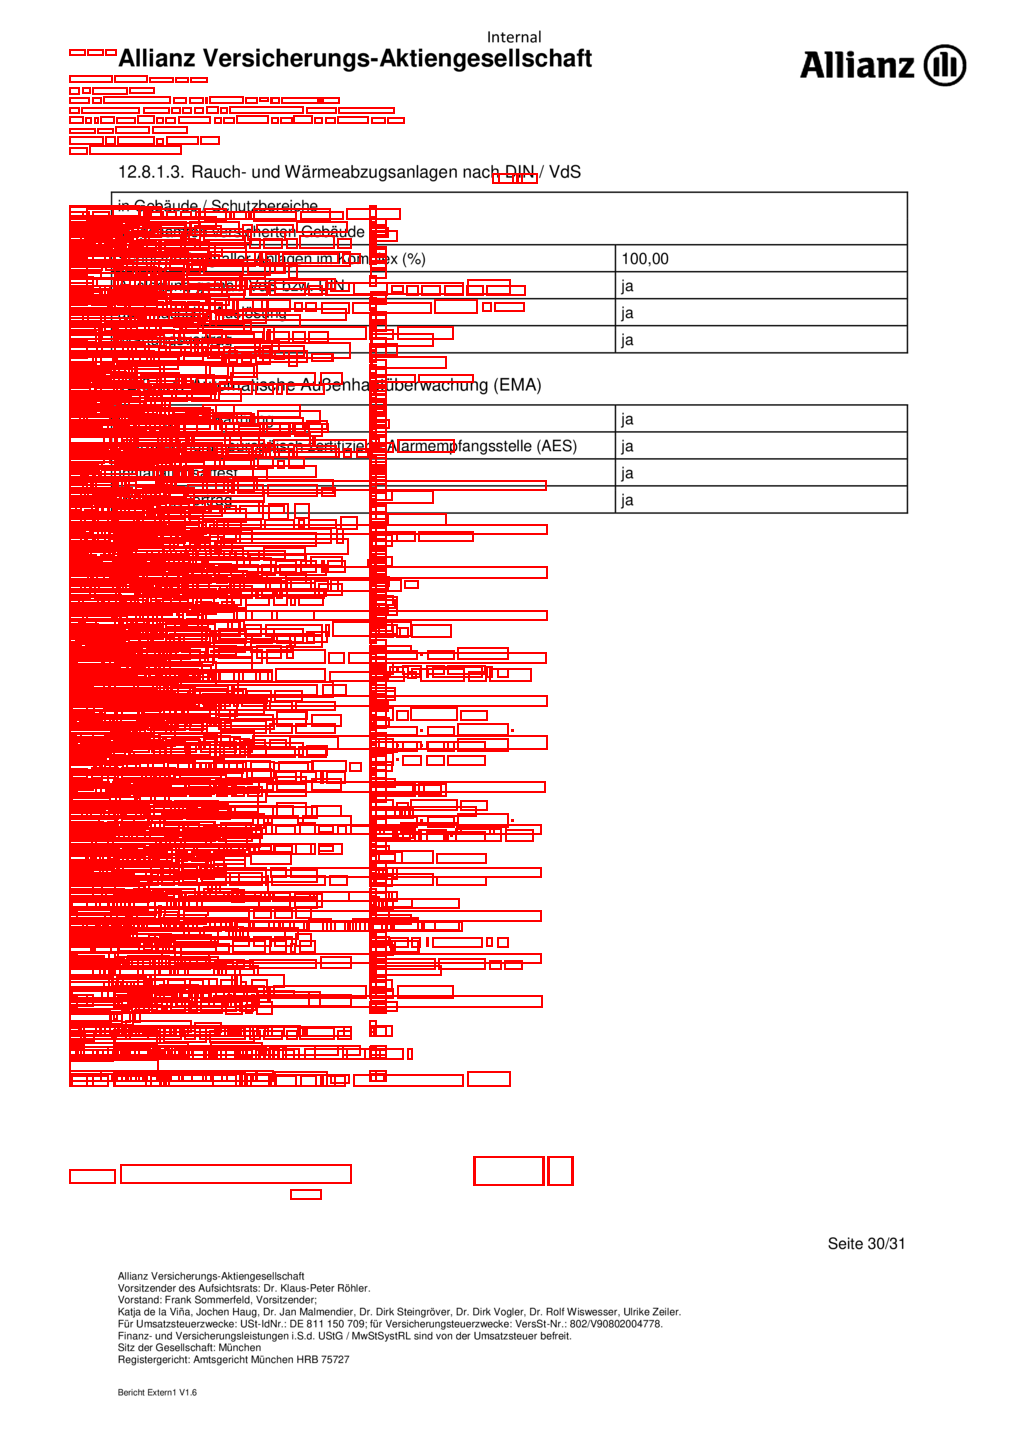

In [209]:
from PIL import ImageDraw, ImageFont

# To get the 'file_path' value from the third row (by position)
file_path = full_df.iloc[2]['file_path']
file_path
bbox = full_df['bbox']

draw_boxes(file_path, bbox, unnormalize_boxes = True)

In [152]:
label_annotations_df

,page_index,top,bottom,x0,y0,x1,y1,label,label_set,start_offset,end_offset,offset_string,file_name,file_path
0,12,113.4576,123.8472,68.3424,718.1928,307.2096,728.5824,Label_Ueberschrift,Komplex,35759,35805,7. Komplex 1 18503 Lager mit Reparatur,page_12.png,data_2/documents/1132/page_12.png
1,12,300.0744,306.5328,68.1912,535.5072,99.6912,541.9656,TBANr_Key,TBANr,36627,36634,TBA-Nr.,page_12.png,data_2/documents/1132/page_12.png
2,12,300.2040,306.6984,360.4968,535.3416,384.4008,541.8360,TBANr_Value,TBANr,36699,36704,18503,page_12.png,data_2/documents/1132/page_12.png
3,12,315.6696,322.2576,68.1912,519.7824,120.2832,526.3704,TBANr_Text_Key,TBANr_Text,36722,36734,TBA-Nr. Text,page_12.png,data_2/documents/1132/page_12.png
4,12,315.6696,324.1008,360.2736,517.9392,472.4568,526.3704,TBANr_Text_Value,TBANr_Text,36794,36821,Lager - Nicht nach Warenart,page_12.png,data_2/documents/1132/page_12.png
5,12,325.9008,334.4256,359.9064,507.6144,494.1432,516.1392,TBANr_Text_Value,TBANr_Text,36912,36946,differenziert - höhere Feuergefahr,page_12.png,data_2/documents/1132/page_12.png
6,16,113.5368,123.8472,68.4144,718.1928,241.5384,728.5032,Label_Ueberschrift,Komplex,51624,51658,8. Komplex 2 18503 Lager 2,page_16.png,data_2/documents/1132/page_16.png
7,16,300.0744,306.5328,68.1912,535.5072,99.6912,541.9656,TBANr_Key,TBANr,52417,52424,TBA-Nr.,page_16.png,data_2/documents/1132/page_16.png
8,16,300.2040,306.6984,360.4968,535.3416,384.4008,541.8360,TBANr_Value,TBANr,52489,52494,18503,page_16.png,data_2/documents/1132/page_16.png
9,16,315.6696,322.2576,68.1912,519.7824,120.2832,526.3704,TBANr_Text_Key,TBANr_Text,52512,52524,TBA-Nr. Text,page_16.png,data_2/documents/1132/page_16.png


In [153]:
full_df = transfer_annotations(no_label_annotations_df, label_annotations_df)

In [154]:
full_df[(full_df['start_offset'] >= 35759) & (full_df['end_offset'] <= 52736)]

,start_offset,end_offset,line_number,offset_string,offset_string_original,page_index,top,bottom,x0,y0,x1,y1,file_name,file_path,label,label_set
2045,35759,35761,2046,7.,7.,12,113.7600,121.4640,68.3424,720.5760,76.5504,728.2800,page_12.png,data_2/documents/1132/page_12.png,Label_Ueberschrift,Komplex
2046,35770,35777,2047,Komplex,Komplex,12,113.5368,123.7392,111.4992,718.3008,156.9600,728.5032,page_12.png,data_2/documents/1132/page_12.png,Label_Ueberschrift,Komplex
2047,35778,35779,2048,1,1,12,113.6232,121.4640,160.9704,720.5760,164.3832,728.4168,page_12.png,data_2/documents/1132/page_12.png,Label_Ueberschrift,Komplex
2048,35780,35785,2049,18503,18503,12,113.5368,121.6584,170.0784,720.3816,199.4904,728.5032,page_12.png,data_2/documents/1132/page_12.png,Label_Ueberschrift,Komplex
2049,35786,35791,2050,Lager,Lager,12,113.5368,123.8472,203.7528,718.1928,232.6968,728.5032,page_12.png,data_2/documents/1132/page_12.png,Label_Ueberschrift,Komplex
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2976,52603,52611,2977,Warenart,Warenart,16,315.6696,322.2576,435.5352,519.7824,472.4568,526.3704,page_16.png,data_2/documents/1132/page_16.png,TBANr_Text_Value,TBANr_Text
2977,52702,52715,2978,differenziert,differenziert,16,325.9008,332.5824,359.9064,509.4576,406.4256,516.1392,page_16.png,data_2/documents/1132/page_16.png,TBANr_Text_Value,TBANr_Text
2978,52716,52717,2979,-,-,16,329.5584,330.3648,409.6656,511.6752,411.8688,512.4816,page_16.png,data_2/documents/1132/page_16.png,TBANr_Text_Value,TBANr_Text
2979,52718,52724,2980,höhere,höhere,16,325.9944,332.5824,415.2528,509.4576,442.3392,516.0456,page_16.png,data_2/documents/1132/page_16.png,TBANr_Text_Value,TBANr_Text


In [160]:
full_df['bbox']

0       [282, 817, 312, 824]
1        [68, 803, 112, 813]
2       [117, 800, 342, 813]
3       [461, 794, 528, 814]
4       [532, 794, 557, 814]
                ...         
5657      [171, 53, 183, 57]
5658      [185, 53, 202, 57]
5659        [68, 34, 83, 38]
5660       [85, 34, 101, 38]
5661      [103, 34, 113, 38]
Name: bbox, Length: 5662, dtype: object

In [ ]:
full_df[full_df['label'] != 'NO_LABEL']

# Liste mit Labels erstellen

In [53]:
category = project.get_category_by_id(2)

In [56]:
category.labels

[Label: Vertragsdetails_Waehrung,
 Label: Vertragsdetails_Einzelprodukt,
 Label: Einzelprodukt_Bezeichnung,
 Label: Kunde_Vorname,
 Label: Vertragsdetails_Versicherungsgesellschaft,
 Label: Kunde_Hausnummer,
 Label: Kunde_Wohnort,
 Label: Vertragsdetails_Gesamtnettobetrag,
 Label: Vertragsdetails_Zahlweise,
 Label: Kunde_Plz,
 Label: Vertragsdetails_Versicherungsende,
 Label: NO_LABEL,
 Label: Kunde_Name,
 Label: Kunde_Straße,
 Label: Vertragsdetails_Versicherungsbeginn,
 Label: Einzelprodukt_Selbstbehalt,
 Label: Einzelprodukt_Versicherungssumme,
 Label: Vertragsdetails_Gesamtbruttobetrag,
 Label: Vertragsdetails_Versicherungsnummer,
 Label: Vertragsdetails_Gesamtprodukt,
 Label: Einzelprodukt_Betrag]

In [16]:
list_of_ner_tags = [label.name_clean for label in category.labels if label.name_clean != "NO_LABEL"]
print(list_of_ner_tags)

['Brandabschnitt_MaxFlaeche', 'Komplex_Nr', 'WBA_Nr_Auswahl', 'TBA_Nr', 'Brandabschnitts_Trennung_VDS', 'Komplex_Ueberschrift', 'RauchWaermeabzugsanlage', 'Brandabschnitts_Trennung', 'TBA_Nr_Text', 'Versichertes_Unternehmen', 'WBA_Nr_Text', 'WBA', 'Sprinkleranlage', 'WBA_Nr', 'Versicherungs_Ort', 'Automatische_BMA']


# Util Functions

In [206]:
def draw_boxes(image_path, boxes, unnormalize_boxes = True):

    # open method used to open different extension image file
    image = Image.open(image_path)
    image = image.convert('RGB')
    
    width, height = image.size
    print(width,height)
    
    if boxes is not None:
        boxes = [unnormalize_box(box, width, height) if unnormalize_boxes else box for box in boxes]

    # draw predictions over the image
    draw = ImageDraw.Draw(image)
    font = ImageFont.load_default()

    if boxes is not None:
        if len(boxes) > 0:
            for box in boxes:
                draw.rectangle(box, outline="red", width=2)
            
    return image

def unnormalize_box(bbox, width, height):
    return [
        int(width * (bbox[0] / 1000)),
        int(height * (bbox[1] / 1000)),
        int(width * (bbox[2] / 1000)),
        int(height * (bbox[3] / 1000)),
    ]